In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Functions for Gabor filterbank generation
def _sigma_prefactor(bandwidth):
    b = bandwidth
    # See http://www.cs.rug.nl/~imaging/simplecell.html
    return 1.0 / np.pi * np.sqrt(np.log(2) / 2.0) * \
        (2.0 ** b + 1) / (2.0 ** b - 1)

def genGabor(freq=0.1, theta=0, bf=1, ba=45, gamma=None, eta=None, c1=0.5, c2=0.5):

    k = 2 ** bf

    if gamma == None or eta == None:        
        gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
        eta = (1/np.pi) * np.sqrt(np.log(1/c2)) * (1/np.tan(ba/2.))#np.float(2 * n * np.sqrt(np.log(1/c2)) / np.pi ** 2)
    
    alpha = freq/gamma
    beta = freq/eta
    
    sigma_x = 1/(np.sqrt(2)*alpha)
    sigma_y = sigma_x#1/(np.sqrt(2)*beta)
    n_stds = 3.
    x0 = np.ceil(max(np.abs(n_stds * sigma_x * np.cos(theta)), np.abs(n_stds * sigma_y * np.sin(theta)), 1))
    y0 = np.ceil(max(np.abs(n_stds * sigma_y * np.cos(theta)), np.abs(n_stds * sigma_x * np.sin(theta)), 1))
    y, x = np.mgrid[-y0:y0 + 1, -x0:x0 + 1]

    xr = x * np.cos(theta) + y * np.sin(theta)
    yr = -x * np.sin(theta) + y * np.cos(theta)
    
    norm_const = (alpha*beta)/np.pi
    gauss = np.exp(- (alpha**2 * xr **2 + beta**2 * yr **2))
    gabor = gauss * np.exp(1j * 2 * np.pi * freq * xr)
    gabor_norm = gabor * norm_const
    
    
    print np.abs(gabor_norm).sum()
#     gauss = (freq ** 2 / (np.pi * gamma * eta)) * np.exp(-((freq / gamma) ** 2 * xr ** 2 + (freq / eta) ** 2 * yr ** 2))
#     gabor = gauss * np.exp(1j * 2 * np.pi * freq * xr)
#     gabor /= np.sum(np.abs(gabor), dtype='float')

    return gabor_norm


def makeGabor_filterbank(min_period=2., max_period=40., bf=1, ba=5, c1=0.5, c2=0.5):
    k = 2 ** bf
    f_high = 1/(min_period)
    f_low = 1/(max_period)

    gamma = (1/np.pi) * np.sqrt(np.log(1/c1)) * ((k+1)/(k-1))
    eta = (1/np.pi) * np.sqrt(np.log(1/c2)) * (1/np.tan(ba/2.))#np.float(2 * n * np.sqrt(np.log(1/c2)) / np.pi ** 2)
    
    frequencies = np.array([k**-ii * f_high for ii in range(20)], dtype=np.float)
    n = np.int(np.round(np.sqrt((eta * np.pi **2)**2 / (4 * np.log(1/c2)))))
    
    print n
    angles = [ii * (np.pi/int(n)) for ii in range(n)]
    frequencies = frequencies[f_low < frequencies]

    gabor_filters = []
#     filter_params = []
    for ii, freq in enumerate(frequencies):
        for jj, theta in enumerate(angles):
            alpha = freq/gamma
            beta = freq/eta
            params = {'freq': freq, 'angle': theta, 'alpha': alpha, 'beta': beta}
            gabor = genGabor(freq=freq, theta=theta, gamma=gamma, eta=eta)
            gabor_filters.append((gabor, params))
#             filter_params.append()

    

    return gabor_filters, frequencies, angles

4
0.9999634846599423
0.9992704044226556
0.9999634846599426
0.9992704044226556
0.9992011043335821
0.9871333595629562
0.9992011043335822
0.9871333595629563
0.9987069696157715
0.9803985130399995
0.9987069696157715
0.9803985130399995
0.9976354866688858
0.9763493409205503
0.9976354866688858
0.9763493409205501
0.9973880505037831
0.9694143754703997
0.9973880505037831
0.9694143754703995


Text(0.5,0.98,'Gabor filterbank ')

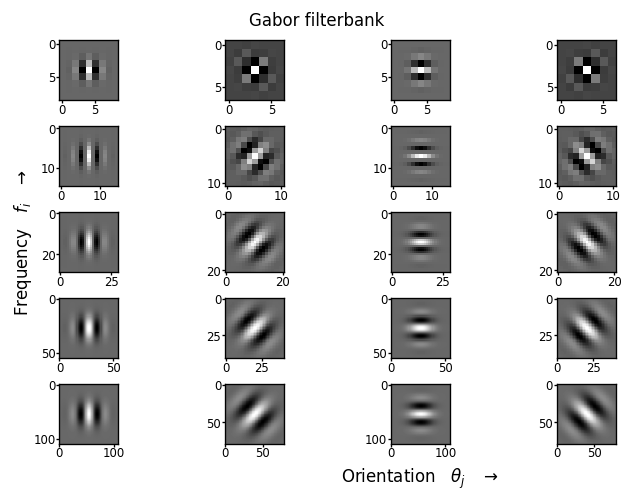

In [11]:
# Generating Gabor filterbank
min_period = 2.
max_period = 35.
bf = 1
ba = np.deg2rad(45)
n_angles = 5
c1 = 0.5
c2 = 0.5  

gabor_filters, frequencies, angles = makeGabor_filterbank(min_period, max_period, bf, ba, c1=c1,
                                                             c2=c2)

n_freq = len(frequencies)
n_angles = len(angles)
# Visualization of filters
fig1, axes1 = plt.subplots(n_freq, n_angles, dpi=120)
ff = 0
for ii, f_i in enumerate(frequencies):
    for jj, a_i in enumerate(angles):
        axes1[ii, jj].imshow(gabor_filters[ff][0].real, cmap='gray') #, vmin=0., vmax=val_max
        axes1[ii, jj].tick_params(axis='both', which='both', labelsize=7, pad=0.1, length=2)#, bottom=False, left=False, labelbottom=False, labelleft=False
        ff += 1
axes1[n_freq-1, np.int(np.ceil(n_angles/2))].set_xlabel('Orientation   $\\theta_j $   $\\rightarrow$', fontsize=10)
axes1[np.int(np.ceil(n_freq/2)), 0].set_ylabel('Frequency   $f_i$   $\\rightarrow$', fontsize=10)
fig1.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.45)
fig1.suptitle('Gabor filterbank ', fontsize=10)
# figcaption('Gabor filter bank', label="fig:gabor_filterbank")